In [22]:
import pandas as pd
import numpy as np
descriptions = pd.read_excel("proshares_analysis_data.xlsx", "descriptions")
hedge_fund_series = pd.read_excel("proshares_analysis_data.xlsx", "hedge_fund_series")
merrill_factors = pd.read_excel("proshares_analysis_data.xlsx", "merrill_factors")
other_data = pd.read_excel("proshares_analysis_data.xlsx", "other_data")

In [23]:
hedge_fund_series

,Unnamed: 0,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
0,2011-08-31,-0.032149,-0.025588,-0.025689,-0.027036,-0.006489
1,2011-09-30,-0.038903,-0.032414,-0.032593,-0.032466,-0.022141
2,2011-10-31,0.026858,0.043593,0.043320,0.050531,0.025239
3,2011-11-30,-0.013453,-0.012142,-0.012431,-0.028608,-0.007964
4,2011-12-31,-0.004479,0.001938,0.001796,0.012875,0.001822
...,...,...,...,...,...,...
153,2024-05-31,0.014100,0.010610,0.010280,0.011225,0.013480
154,2024-06-30,-0.000300,0.001292,0.001114,-0.001986,0.003188
155,2024-07-31,0.012700,0.023803,0.023166,0.024381,0.011279
156,2024-08-31,0.002500,-0.000733,-0.000766,-0.002413,0.007648


In [20]:
merrill_factors

,Unnamed: 0,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
0,2011-08-31,-0.054976,0.000009,-0.092549,-0.087549,-0.005889,-0.088913
1,2011-09-30,-0.069420,0.000017,-0.179063,-0.108082,0.142180,-0.111505
2,2011-10-31,0.109147,-0.000013,0.162986,0.096274,-0.069502,0.151011
3,2011-11-30,-0.004064,0.000000,-0.019724,-0.021765,0.054627,-0.003784
4,2011-12-31,0.010449,0.000009,-0.042649,-0.021744,0.075581,0.005144
...,...,...,...,...,...,...,...
153,2024-05-31,0.050580,0.004501,0.019517,0.050603,-0.028355,0.050383
154,2024-06-30,0.035280,0.004462,0.026176,-0.018270,0.032101,-0.011243
155,2024-07-31,0.012109,0.004403,0.008453,0.025916,-0.016610,0.103356
156,2024-08-31,0.023365,0.004260,0.009779,0.032603,-0.035513,-0.016885


In [66]:
# Analyzing the Data
# 2.1
hedge_fund = hedge_fund_series[hedge_fund_series.columns[1:]]
result_1 = pd.DataFrame(hedge_fund.mean()*12, columns=['mean'])
result_1['volatility'] = hedge_fund.std()*np.sqrt(12)
result_1['Sharpe ratio']=result_1['mean']/result_1['volatility']

In [67]:
result_1

,mean,volatility,Sharpe ratio
HFRIFWI Index,0.048295,0.059476,0.812004
MLEIFCTR Index,0.036286,0.056136,0.646398
MLEIFCTX Index,0.034605,0.055980,0.618172
HDG US Equity,0.024812,0.058408,0.424805
QAI US Equity,0.025653,0.050009,0.512971


In [26]:
# 2.2
import scipy.stats as stats

skewness = stats.skew(hedge_fund)
kurtosis = stats.kurtosis(hedge_fund)
VaR_05 = hedge_fund.quantile(0.05)
# CVaR (0.05) - mean of returns at or below the 5th quantile
CVaR_05 = hedge_fund[hedge_fund <= VaR_05].mean()

In [32]:
result_2 = pd.DataFrame(index = hedge_fund.columns, data = {'skewness':skewness, 'kurtosis':kurtosis, 'VaR_05':VaR_05,'CVaR_05':CVaR_05})
result_2

,skewness,kurtosis,VaR_05,CVaR_05
HFRIFWI Index,-0.954148,5.544571,-0.024293,-0.037478
MLEIFCTR Index,-0.262868,1.542667,-0.028189,-0.035857
MLEIFCTX Index,-0.248887,1.508071,-0.028095,-0.035816
HDG US Equity,-0.251781,1.666333,-0.030932,-0.037575
QAI US Equity,-0.430637,1.517826,-0.017895,-0.032695


In [33]:
# Calculate Maximum drawdown of hedge_fund_series
def max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown_value = drawdown.min()

    end_date = drawdown.idxmin()
    start_date = cumulative_returns[:end_date].idxmax()
    recovery_date = (cumulative_returns[end_date:] > cumulative_returns[start_date]).idxmax()

    return max_drawdown_value, start_date, end_date, recovery_date

In [47]:
df = pd.DataFrame(index=hedge_fund.columns,columns=['max_drawdown_value', 'start_date', 'end_date', 'recovery_date'])
for column in hedge_fund.columns:
    result = max_drawdown(hedge_fund[column])
    df.loc[column] = result
df

,max_drawdown_value,start_date,end_date,recovery_date
HFRIFWI Index,-0.115473,100,103,108
MLEIFCTR Index,-0.124302,118,133,150
MLEIFCTX Index,-0.124388,118,133,150
HDG US Equity,-0.14072,118,133,155
QAI US Equity,-0.137716,118,133,150


In [57]:
# 2.3
import statsmodels.api as sm

spy = merrill_factors[['SPY US Equity']]
def calculate_regression_stats(hedge_fund, spy, periods_per_year=12):
    
    X = sm.add_constant(spy)
    model = sm.OLS(hedge_fund, X).fit()

    beta = model.params[1]
    residuals = model.resid # (hedge fund returns - predicted hedge fund returns)

    average_return = hedge_fund.mean()
    treynor_ratio = average_return / beta
    information_ratio = residuals.mean() / residuals.std()

    annual_beta = beta
    annual_treynor_ratio = treynor_ratio * np.sqrt(periods_per_year)
    annual_information_ratio = information_ratio * np.sqrt(periods_per_year)

    return {
        'Beta': annual_beta,
        'Treynor Ratio': annual_treynor_ratio,
        'Information Ratio': annual_information_ratio,
        'Regression Summary': model.summary()
    }

results = {}

for column in hedge_fund.columns:
    hedge_fund_returns = hedge_fund[column]
    stats = calculate_regression_stats(hedge_fund_returns, spy)
    results[column] = stats

for fund, metrics in results.items():
    print(f"Results for {fund}:")
    print(f"  Market Beta: {metrics['Beta']}")
    print(f"  Treynor Ratio (Annualized): {metrics['Treynor Ratio']}")
    print(f"  Information Ratio (Annualized): {metrics['Information Ratio']}")
    print(metrics['Regression Summary'])
    print("\n")

Results for HFRIFWI Index:
  Market Beta: 0.3461308712254951
  Treynor Ratio (Annualized): 0.04027824316928991
  Information Ratio (Annualized): -9.072894394139538e-17
                            OLS Regression Results                            
Dep. Variable:          HFRIFWI Index   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     384.7
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           5.90e-44
Time:                        19:36:35   Log-Likelihood:                 516.72
No. Observations:                 158   AIC:                            -1029.
Df Residuals:                     156   BIC:                            -1023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err       

<AxesSubplot:>

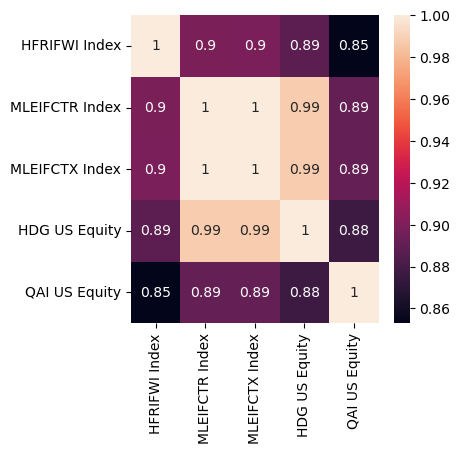

In [54]:
# 2.5
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
correlation_matrix = hedge_fund.corr()
sns.heatmap(correlation_matrix, 
        xticklabels=correlation_matrix.columns,
        yticklabels=correlation_matrix.columns, annot=True)

In [58]:
# 2.6
from sklearn.linear_model import LinearRegression

y = hedge_fund_series['HFRIFWI Index']
X = merrill_factors[['SPY US Equity', 'USGG3M Index', 'EEM US Equity', 'EFA US Equity', 'EUO US Equity', 'IWM US Equity']]

reg = LinearRegression().fit(X, y)

intercept = reg.intercept_
betas = reg.coef_

r_squared = reg.score(X, y)
y_pred = reg.predict(X)
tracking_error = y - y_pred
volatility_tracking_error = np.std(tracking_error)

regression_results = {
    "Intercept (alpha)": intercept,
    "Betas": betas,
    "R-squared": r_squared,
    "Volatility of tracking error": volatility_tracking_error
}

regression_results

{'Intercept (alpha)': 0.0012353360960771628,
 'Betas': array([0.03648332, 0.14633597, 0.08161123, 0.08463804, 0.02880573,
        0.14511063]),
 'R-squared': 0.8396762289195674,
 'Volatility of tracking error': 0.006852878265878924}

In [64]:
# 2.7
rolling_window = 60
oos_predictions = []
actual_hfri = hedge_fund_series['HFRIFWI Index'][rolling_window:]

for t in range(rolling_window, len(hedge_fund_series)):
    X_train = X.iloc[t-rolling_window:t, :]
    y_train = hedge_fund_series['HFRIFWI Index'].iloc[t-rolling_window:t]
    
    reg = LinearRegression().fit(X_train, y_train)
    
    X_test = X.iloc[t, :].values.reshape(1, -1)
    
    y_pred = reg.predict(X_test)
    oos_predictions.append(y_pred[0])

oos_results_df = pd.DataFrame({
    'Actual HFRI': actual_hfri.values,
    'Predicted HFRI': oos_predictions
})

oos_results_df.head()

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

,Actual HFRI,Predicted HFRI
0,0.004274,0.004966
1,0.006468,0.005001
2,-0.005947,-0.004449
3,0.007660,0.011651
4,0.010063,0.007650


In [65]:
y = hedge_fund_series['HFRIFWI Index']

reg_no_intercept = LinearRegression(fit_intercept=False).fit(X, y)
betas_no_intercept = reg_no_intercept.coef_
fitted_no_intercept = reg_no_intercept.predict(X)

mean_fitted_no_intercept = np.mean(fitted_no_intercept)
mean_hfri = np.mean(y)

correlation_no_intercept = np.corrcoef(fitted_no_intercept, y)[0, 1]

reg_with_intercept = LinearRegression().fit(X, y)
fitted_with_intercept = reg_with_intercept.predict(X)  # Using the model with intercept

correlation_with_intercept = np.corrcoef(fitted_with_intercept, y)[0, 1]

no_intercept_results = {
    "Betas (no intercept)": betas_no_intercept,
    "Mean of fitted values (no intercept)": mean_fitted_no_intercept,
    "Mean of actual HFRI": mean_hfri,
    "Correlation (no intercept)": correlation_no_intercept,
    "Correlation (with intercept)": correlation_with_intercept
}

no_intercept_results


#The correlation between the fitted values and the actual HFRI is very similar in both cases, but slightly better with the intercept.

{'Betas (no intercept)': array([0.05066718, 0.4993357 , 0.08086555, 0.07914571, 0.03137321,
        0.14265099]),
 'Mean of fitted values (no intercept)': 0.0032952112756632723,
 'Mean of actual HFRI': 0.004024576917344343,
 'Correlation (no intercept)': 0.9156937941419591,
 'Correlation (with intercept)': 0.9163384903623595}